<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Recommended food venues in New York City</font></h1>

# 1. Introduction
<pre> My client who operates some food venues in New York often mailed to customers who ever visited there in order to drive sales. But his sales volume has not increased more than he expected. 
<br> Now he thinks that any strategy is needed to invite new customer. So, I propose finding prospective new customer on Forsqare users and advertise them by any means. </pre>

# 2. Data (Collected rom Forsquare)
<pre> Forsquare provides venue and users who liked or listed it, so that we can assume what kind of people is interested in what kind of venue in a certain extent.</pre>
<pre> Unfortunately, venues which has been visited by users actually are not requested by other than themselves.</pre>

<a id='item1'></a>

## 2.1. Categories of food venues
<pre> On Forsqure, there are many kind of restaurant categorised,American, Japanese,Chinese, etc</pre>

### 2.1.1. Import libraries and set credencial parameters for requesting Forsquare

In [1]:
import requests
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt


In [2]:
CLIENT_ID = '0M1FP2WZQWZVPMAO5JYWJH4TYG0EBXEVP5113LWGRD0TL1A1' # your Foursquare ID
CLIENT_SECRET = 'CV0H1BAVHO21JIAJJTXOVB0CHJOBEWWYMZMWAMFDJCSF0ICP' # your Foursquare Secret
VERSION = '20190609' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0M1FP2WZQWZVPMAO5JYWJH4TYG0EBXEVP5113LWGRD0TL1A1
CLIENT_SECRET:CV0H1BAVHO21JIAJJTXOVB0CHJOBEWWYMZMWAMFDJCSF0ICP


### 2.1.2. Set parameters for ex/importing filels from/to ICOS

In [3]:
import ibm_boto3
from ibm_botocore.client import Config

credentials = {
  "apikey": "4s-6O2V713XZoS72Xa7SJazP0vlkAXNE1xz9pczDJYmV",
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key 7eadd029-6ef5-425e-8d9a-c6f07465017e",
  "iam_apikey_name": "WDP-Editor-recommendedrestaurantfromforsquar-donotdelete-pr-o6qybii56fwa2b",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/08d04e5af133a45b15f31a667a960463::serviceid:ServiceId-25b03739-107a-4836-b7a6-b8aa87b91034",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/08d04e5af133a45b15f31a667a960463:2ff03d40-7b1f-498e-b990-9cead042d709::",
  "BUCKET": "recommendedrestaurantfromforsquar-donotdelete-pr-o6qybii56fwa2b"  

}
auth_endpoint = 'https://iam.cloud.ibm.com/oidc/token'
service_endpoint = 'https://s3.ap-geo.objectstorage.service.networklayer.com'
cos = ibm_boto3.client(service_name='s3',
                           ibm_api_key_id=credentials['apikey'],
                           ibm_service_instance_id=credentials['resource_instance_id'],
                           ibm_auth_endpoint=auth_endpoint,
                           config=Config(signature_version='oauth'),
                           endpoint_url=service_endpoint,)

### 2.1.3. Request all venues categories

In [4]:
url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
cat_results = requests.get(url).json()


### 2.1.4. Extract restaurant categories

In [5]:
categories=[]
catname=[]
df_cat=pd.DataFrame(index=[],columns=['category1_id','category1_name','category2_id','category2_name','category3_id','category3_name'])
for cat in cat_results['response']['categories']:
    if cat['name']=='Food':
        for s1cat in cat['categories']:
            if s1cat['categories']:
                for s2cat in s1cat['categories']:
                    if s2cat['categories']:
                        for s3cat in s2cat['categories']:
                            record = pd.Series([s1cat['id'],s1cat['name'],s2cat['id'],s2cat['name'],s3cat['id'],s3cat['name']], index=df_cat.columns)
                            df_cat=df_cat.append(record,ignore_index=True)
                    else:
                        record = pd.Series([s1cat['id'],s1cat['name'],s2cat['id'],s2cat['name'],np.nan,np.nan], index=df_cat.columns)
                        df_cat=df_cat.append(record,ignore_index=True)
            else:
                record = pd.Series([s1cat['id'],s1cat['name'],np.nan,np.nan,np.nan,np.nan],index=df_cat.columns)
                df_cat=df_cat.append(record,ignore_index=True)
df_cat.head()

,category1_id,category1_name,category2_id,category2_name,category3_id,category3_name
0,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,NaN,NaN
1,4bf58dd8d48988d1c8941735,African Restaurant,4bf58dd8d48988d10a941735,Ethiopian Restaurant,NaN,NaN
2,4bf58dd8d48988d14e941735,American Restaurant,4bf58dd8d48988d157941735,New American Restaurant,NaN,NaN
3,5f2c2b7db6d05514c7044837,Armenian Restaurant,NaN,NaN,NaN,NaN
4,4bf58dd8d48988d142941735,Asian Restaurant,56aa371be4b08b9a8d573568,Burmese Restaurant,NaN,NaN


In [38]:
print(df_cat.shape)
df_cat.head()

(314, 6)


,category1_id,category1_name,category2_id,category2_name,category3_id,category3_name
0,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,NaN,NaN
1,4bf58dd8d48988d1c8941735,African Restaurant,4bf58dd8d48988d10a941735,Ethiopian Restaurant,NaN,NaN
2,4bf58dd8d48988d14e941735,American Restaurant,4bf58dd8d48988d157941735,New American Restaurant,NaN,NaN
3,5f2c2b7db6d05514c7044837,Armenian Restaurant,NaN,NaN,NaN,NaN
4,4bf58dd8d48988d142941735,Asian Restaurant,56aa371be4b08b9a8d573568,Burmese Restaurant,NaN,NaN


In [6]:
df_cat.to_csv('./category.csv')

## 2.2. Food venues in New York
<pre>Request <font color="#c71585">venues</font>, fillterd by restaurant categories,by New York , then create datas frame.</pr>

### 2.2.1. Request NY food venues per categories

In [321]:
NEAR='NY'
LIMIT=50
df_venues=pd.DataFrame(index=[],columns=['venue_id','venue_name','category_id','category_name'])
#for CAT in df_cat['cat']: 
for CAT in pd.concat([df_cat[df_cat['category1_id'].notna()].category1_id,df_cat[df_cat['category2_id'].notna()].category2_id,df_cat[df_cat['category3_id'].notna()].category3_id]): 
    url2='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&categoryId={}&near={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,CAT,NEAR,LIMIT)
    for ret in requests.get(url2).json()['response']['venues']:
        for cat in ret['categories']:
            record=pd.Series([ret['id'],ret['name'],cat['id'],cat['name']],index=df_venues.columns)
            df_venues=df_venues.append(record,ignore_index=True)
print(df_venues.shape)
df_venues.head()

(19732, 4)


,venue_id,venue_name,category_id,category_name
0,5216d2ea11d2f50a834d55d8,Walid Halal Food,503288ae91d4c4b30a586d67,Afghan Restaurant
1,543c67f4498ef974a5701b84,afghan kebab house,503288ae91d4c4b30a586d67,Afghan Restaurant
2,582a1b095f78034bcfb69186,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant
3,5af9c0fa9e0d5400398a745f,Bakhtar Afghan Wali Baba Grill,503288ae91d4c4b30a586d67,Afghan Restaurant
4,57b8f763cd10f71921e464b5,Kabul Kebab,503288ae91d4c4b30a586d67,Afghan Restaurant


In [40]:
df_venues=df_venues.drop_duplicates(subset='venue_id',keep='last')
df_venues=df_venues.drop_duplicates(subset='venue_name',keep='last')
print(df_venues.shape)
df_venues.head()

(4135, 4)


,venue_id,venue_name,category_id,category_name
0,5216d2ea11d2f50a834d55d8,Walid Halal Food,503288ae91d4c4b30a586d67,Afghan Restaurant
1,543c67f4498ef974a5701b84,afghan kebab house,503288ae91d4c4b30a586d67,Afghan Restaurant
2,582a1b095f78034bcfb69186,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant
3,5af9c0fa9e0d5400398a745f,Bakhtar Afghan Wali Baba Grill,503288ae91d4c4b30a586d67,Afghan Restaurant
4,57b8f763cd10f71921e464b5,Kabul Kebab,503288ae91d4c4b30a586d67,Afghan Restaurant


In [ ]:
df_venues.to_csv('./NY_restaurant.csv',index=False)
for filename in ['./NY_restaurant.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

### 2.2.2. Merge venues with category1,2,3

In [183]:
df_tmp3=df_venues[df_venues['category_id'].isin(df_cat['category3_id'])].rename(columns={'category_id':'category3_id','category_name':'category3_name'})
df_tmp3=pd.merge(df_tmp3,df_cat,on='category3_id',how='inner')[['venue_id','venue_name','category1_id','category1_name','category2_id','category2_name','category3_id','category3_name_x']].rename(columns={'category3_name_x':'category3_name'})


In [184]:
df_tmp2=df_venues[df_venues['category_id'].isin(df_cat['category2_id'])].rename(columns={'category_id':'category2_id','category_name':'category2_name'})
df_tmp2=pd.merge(df_tmp2,df_cat[df_cat.category2_id.notna()].drop_duplicates('category2_id'),on='category2_id',how='inner')[['venue_id','venue_name','category1_id','category1_name','category2_id','category2_name_x','category3_id','category3_name']].rename(columns={'category2_name_x':'category2_name'})


In [ ]:
df_tmp1=df_venues[df_venues['category_id'].isin(df_cat['category1_id'])].rename(columns={'category_id':'category1_id','category_name':'category1_name'})
df_tmp=pd.merge(df_tmp1,df_cat[df_cat.category1_id.notna()].drop_duplicates('category1_id'),on='category1_id',how='inner')[['venue_id','venue_name','category1_id','category1_name_x','category2_id','category2_name']].rename(columns={'category1_name_x':'category1_name'})
df_tmp1=pd.concat([df_tmp,pd.DataFrame([['0','0']]*len(df_tmp))], axis=1).rename(columns={0:'category3_id',1:'category3_name'})
df_tmp1

In [186]:
df_venues_cat=pd.concat([df_tmp1,df_tmp2,df_tmp3])

In [187]:
df_venues_cat.to_csv('./NY_restaurant_cat.csv',index=False)
for filename in ['./NY_restaurant_cat.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

### <span style="color:#CC3366">Import from csv files, for convenience.</span>

In [6]:
for filename in ['./NY_restaurant_cat.csv','./NY_restaurant.csv','./category.csv']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)
df_venues=pd.read_csv('./NY_restaurant.csv')
df_venues_cat=pd.read_csv('./NY_restaurant_cat.csv')

In [7]:
print(df_venues.shape)
df_venues_cat.head()

(4135, 4)


,venue_id,venue_name,category1_id,category1_name,category2_id,category2_name,category3_id,category3_name
0,5216d2ea11d2f50a834d55d8,Walid Halal Food,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
1,543c67f4498ef974a5701b84,afghan kebab house,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
2,582a1b095f78034bcfb69186,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
3,5af9c0fa9e0d5400398a745f,Bakhtar Afghan Wali Baba Grill,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
4,57b8f763cd10f71921e464b5,Kabul Kebab,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0


## 2.3. Users and venues on Tips and Lists
<pre>Request <font color="#c71585">venue detail</font> for all food venues in New York extracted previous step and extract tips and lists, which will be used to collect users.</pre>

### 2.3.1. Request Venue detail


In [9]:
df_tips=pd.DataFrame(index=[],columns=['venue_id','user_id','tip_id','tip_text'])
df_lists=pd.DataFrame(index=[],columns=['venue_id','user_id','list_id'])
for venue_id in df_venues['venue_id']:
    url3='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id,CLIENT_ID,CLIENT_SECRET,VERSION)
    ret=requests.get(url3).json()['response']['venue']
    for groups in ret['tips']['groups']:
        for tip in groups['items']:
            record=pd.Series([venue_id,tip['user']['id'],tip['id'],tip['text']],index=df_tips.columns)
            df_tips=df_tips.append(record,ignore_index=True)
    for groups in ret['listed']['groups']:
        for listed in groups['items']:
            record=pd.Series([venue_id,listed['user']['id'],listed['id']],index=df_lists.columns)
            df_lists=df_lists.append(record,ignore_index=True)
df_tips.to_csv('./NY_restaurant_tips.csv',index=False)
df_lists.to_csv('./NY_restaurant_lists.csv',index=False)
for filename in ['./NY_restaurant_tips.csv','./NY_restaurant_lists.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

### <span style="color:#CC3366">2.3.2. Import venue,venue with category files,which was collected before, for convenience.</span>

In [8]:
for filename in ['./NY_restaurant_lists.csv','./NY_restaurant_tips.csv']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)

In [45]:
df_tips=pd.read_csv('./NY_restaurant_tips.csv')
df_lists=pd.read_csv('./NY_restaurant_lists.csv')
print(df_tips.shape)
df_tips.loc[:,['venue_id','user_id']].head()


(7006, 4)


,venue_id,user_id
0,582a1b095f78034bcfb69186,1265687
1,582a1b095f78034bcfb69186,192962359
2,57b8f763cd10f71921e464b5,2868030
3,51ec708d498e58679aa83bca,59130915
4,541f4507498e3a898af35a90,35551887


In [46]:
print(df_lists.shape)
df_lists.loc[:,['venue_id','user_id']].head()

(12042, 3)


,venue_id,user_id
0,582a1b095f78034bcfb69186,7548664
1,582a1b095f78034bcfb69186,12113441
2,582a1b095f78034bcfb69186,125417687
3,582a1b095f78034bcfb69186,23355
4,57b8f763cd10f71921e464b5,9427412


### 2.3.3. Extract users on Tips and Listed

In [48]:
df_users=pd.concat([df_tips['user_id'],df_lists['user_id']],axis=0)
df_users=df_users[~df_users.duplicated()]
df_users=pd.DataFrame(df_users,columns=['user_id'])
df_users=df_users.reset_index(drop=True)
print('Shape of df_users is {}.'.format(df_users.shape))

Shape of df_users is (8751, 1).


In [11]:
df_tips.to_csv('./NY_restaurant_tips.csv',index=False)
df_lists.to_csv('./NY_restaurant_lists.csv',index=False)
df_users.to_csv('./users.csv',index=False)
for filename in ['./NY_restaurant_tips.csv','./NY_restaurant_lists.csv','./users.csv',]:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

In [53]:
print(df_users.shape)
df_users.head()


(8751, 1)


,user_id
0,1265687
1,192962359
2,2868030
3,59130915
4,35551887


## 2.4. Liked venues by users 
<pre>Request <font color="#c71585">user liked</font> restaurant in New York.</pre>

### <span style="color:#CC3366">2.4.1. Import df_tips and df_lists,which was collected before, for convenience.</span>

In [54]:
for filename in ['./NY_restaurant_tips.csv','./NY_restaurant_lists.csv']:
        cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)

df_tips=pd.read_csv('./NY_restaurant_tips.csv')
df_lists=pd.read_csv('./NY_restaurant_lists.csv')

print('Shape of df_tips is {}.'.format(df_tips.shape))
print('Shape of df_lists is {}.'.format(df_lists.shape))
#print('Shape of df_venues is {}.'.format(df_venues.shape))

Shape of df_tips is (7006, 4).
Shape of df_lists is (12042, 3).


### 2.4.2. Request liked venues for each users

> These data are collected by hourly scheduled job for several days, because the amount of query per hour is limited to 500.  
<a href="https://jp-tok.dataplatform.cloud.ibm.com/analytics/notebooks/v2/ff94193e-a0a8-4903-9395-013219d9fc82/view?projectid=01ab7968-c51f-428e-803b-e152e17be8d7&context=wdp">Collecting users' Liked data</a>

### <span style="color:#CC3366">2.4.3. Import df_liked1, df_liked2 ,which was collected before, </span>

In [55]:
for filename in ['./liked.csv','./liked2.csv','./liked3.csv','./users.csv']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)
df_liked=pd.read_csv('./liked.csv')
df_liked2=pd.read_csv('./liked2.csv')
df_liked3=pd.read_csv('./liked3.csv')
df_users=pd.read_csv('./users.csv')

df_liked=pd.concat([df_liked,df_liked2,df_liked3],axis=0)
print(df_liked.shape)
df_liked=df_liked.drop_duplicates(['user_id','venue_id'],keep='last')
print(df_liked.shape)
df_liked.head()

(28755, 3)
(28755, 3)


,user_id,venue_id,score
0,1265687,5d7d2f62774999000703bdcb,2
1,1265687,5d7c220a72c409000888c908,2
2,1265687,5cc1f2e804d1ae002cf25f49,2
3,1265687,5c68aeb7a2a6ce002c194d62,2
4,1265687,5c269eb75bc27d002572ad19,2


### 2.4.4. Drop records category of which is not restaurant

In [56]:
df_liked=df_liked[df_liked['venue_id'].isin(df_venues_cat['venue_id'])]

In [57]:
df_liked=df_liked.assign(score=3)
print(df_liked.shape)
df_liked[['user_id','venue_id']].head()

(6233, 3)


,user_id,venue_id
0,1265687,5d7d2f62774999000703bdcb
10,1265687,5a13402d286fda3f038703e0
15,1265687,582a1b095f78034bcfb69186
16,1265687,58225a8f001d8755c9c4bcd1
32,2868030,57b8f763cd10f71921e464b5


___

# 3. Methodology
<pre>We assume score users to restaurant as bellow, and I think we can predict users to unevaluated venues by collaborative filtering.
 <br> - liked venues as 2<br> - venues on lists as 3 and ones on tips as 5<br> - venues same category as on lists and tips as 1</span>

## 3.1. Score

### 3.1.1. Venues on lists are scored as 3 and ones on tips as 5

In [17]:
df_tips2=df_tips.assign(score=5)
df_tips2=df_tips2.drop_duplicates(subset=['user_id','venue_id','tip_id'],keep='last')

In [18]:
df_lists2=df_lists.assign(score=4)
df_lists2=df_lists2.drop_duplicates(subset=['user_id','venue_id','list_id'],keep='last')

In [19]:
df_tips2=df_tips2[df_tips2['venue_id'].isin(df_venues['venue_id'])]
df_lists2=df_lists2[df_lists2['venue_id'].isin(df_venues['venue_id'])]
print(df_tips2.shape)
print(df_lists2.shape)

(5945, 5)
(10374, 4)


### 3.1.2. Merge liked,tips,lists

In [20]:
df_tmp=df_liked[df_liked['user_id'].isin(df_tips['user_id'])]
df_like_in=df_tmp[df_tmp['venue_id'].isin(df_tips['venue_id'])]

In [21]:
df_scores=pd.concat([df_tips2[['user_id','venue_id','score']],df_lists2[['user_id','venue_id','score']]]).drop_duplicates(['user_id','venue_id'],keep='last')
df_scores=pd.concat([df_scores,df_like_in]).drop_duplicates(['user_id','venue_id'],keep='first')
print(df_scores.shape)
df_scores.head()

(20322, 3)


,user_id,venue_id,score
0,1265687,582a1b095f78034bcfb69186,5
1,192962359,582a1b095f78034bcfb69186,5
2,2868030,57b8f763cd10f71921e464b5,5
3,59130915,51ec708d498e58679aa83bca,5
5,35551887,541f4507498e3a898af35a90,5


In [22]:
df_scores[~df_scores['venue_id'].isin(df_venues['venue_id'])]

,user_id,venue_id,score


In [23]:
df_scores['score'].value_counts()

4    10060
5     5485
3     4777
Name: score, dtype: int64

### 3.1.3. Venues same category as on lists and tips

In [24]:
df_scores_cat=pd.merge(df_scores,df_venues_cat,on='venue_id')
print(df_scores_cat.shape)
df_scores_cat.head()

(20322, 10)


,user_id,venue_id,score,venue_name,category1_id,category1_name,category2_id,category2_name,category3_id,category3_name
0,1265687,582a1b095f78034bcfb69186,5,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
1,192962359,582a1b095f78034bcfb69186,5,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
2,7548664,582a1b095f78034bcfb69186,4,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
3,12113441,582a1b095f78034bcfb69186,4,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0
4,125417687,582a1b095f78034bcfb69186,4,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant,NaN,NaN,0,0


#### 3.1.3.1. Category 3 (bottom) as score 2

In [23]:
tmp=[[uid,df_scores_cat[(df_scores_cat['category3_id'].isin(df_scores_cat[df_scores_cat['user_id']==uid].category3_id.unique()))&(df_scores_cat['user_id']!=uid)].venue_id.unique().tolist()] for uid in df_scores_cat['user_id'].unique()]
tmp2=[np.array([np.full(len(r[1]),r[0]),r[1],np.full(len(r[1]),2)]).T.tolist() for r in tmp]
import itertools
add_cat3=list(itertools.chain.from_iterable(tmp2))
df_add_cat3=pd.DataFrame(add_cat3,columns=['user_id','venue_id','score'])
print(df_add_cat3.shape)
df_add_cat3.head()

(13596757, 3)


,user_id,venue_id,score
0,1265687,582a1b095f78034bcfb69186,2
1,1265687,57b8f763cd10f71921e464b5,2
2,1265687,51ec708d498e58679aa83bca,2
3,1265687,541f4507498e3a898af35a90,2
4,1265687,4d1e78d2dd6a236a57532738,2


In [24]:
df_add_cat3.to_csv('./df_add_cat3.csv',index=False)
for filename in ['./df_add_cat3.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

#### 3.1.3.2. Category 2 (middle) as score 2

In [25]:
import itertools
tmp=[[uid,df_scores_cat[(df_scores_cat['category2_id'].isin(df_scores_cat[df_scores_cat['user_id']==uid].category2_id.unique()))&(df_scores_cat['user_id']!=uid)].venue_id.unique().tolist()] for uid in df_scores_cat['user_id'].unique()]
tmp2= [np.array([np.full(len(r[1]),r[0]),r[1],np.full(len(r[1]),1)]).T.tolist() for r in tmp]
add_cat2=list(itertools.chain.from_iterable(tmp2))
df_add_cat2=pd.DataFrame(add_cat2,columns=['user_id','venue_id','score'])
print(df_add_cat2.shape)
df_add_cat2.head()

(7084967, 3)


,user_id,venue_id,score
0,1265687,582a1b095f78034bcfb69186,1
1,1265687,57b8f763cd10f71921e464b5,1
2,1265687,51ec708d498e58679aa83bca,1
3,1265687,541f4507498e3a898af35a90,1
4,1265687,4d1e78d2dd6a236a57532738,1


In [26]:
df_add_cat2.to_csv('./df_add_cat2.csv',index=False)
for filename in ['./df_add_cat2.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

#### 3.1.3.3. Category 1 (top) as score 2

In [25]:
import itertools
tmp=[[uid,df_scores_cat[(df_scores_cat['category1_id'].isin(df_scores_cat[df_scores_cat['user_id']==uid].category1_id.unique()))&(df_scores_cat['user_id']!=uid)].venue_id.unique().tolist()] for uid in df_scores_cat['user_id'].unique()]
tmp2= [np.array([np.full(len(r[1]),r[0]),r[1],np.full(len(r[1]),1)]).T.tolist() for r in tmp]
add_cat1=list(itertools.chain.from_iterable(tmp2))
df_add_cat1=pd.DataFrame(add_cat1,columns=['user_id','venue_id','score'])
print(df_add_cat1.shape)
df_add_cat1.head()

(2561259, 3)


,user_id,venue_id,score
0,1265687,582a1b095f78034bcfb69186,1
1,1265687,57b8f763cd10f71921e464b5,1
2,1265687,51ec708d498e58679aa83bca,1
3,1265687,541f4507498e3a898af35a90,1
4,1265687,4d1e78d2dd6a236a57532738,1


In [26]:
df_add_cat1.to_csv('./df_add_cat1.csv',index=False)
for filename in ['./df_add_cat1.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

### 3.1.4. Merge all to scores data

In [27]:
for filename in ['./df_add_cat3.csv','./df_add_cat2.csv','./df_add_cat1.csv']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)

In [28]:
df_add_cat3=pd.read_csv('./df_add_cat3.csv')
df_add_cat2=pd.read_csv('./df_add_cat2.csv')
df_add_cat1=pd.read_csv('./df_add_cat1.csv')

In [33]:
df_scores=pd.concat([df_scores,df_add_cat3,df_add_cat2,df_add_cat1]).drop_duplicates(subset=['user_id','venue_id'],keep='first')
print(df_scores.shape)
df_scores.head()

(15218507, 3)


,user_id,venue_id,score
0,1265687,582a1b095f78034bcfb69186,5
1,192962359,582a1b095f78034bcfb69186,5
2,2868030,57b8f763cd10f71921e464b5,5
3,59130915,51ec708d498e58679aa83bca,5
5,35551887,541f4507498e3a898af35a90,5


In [34]:
df_scores.to_csv('./df_scores.csv',index=False)
for filename in ['./df_scores.csv']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

In [8]:
for filename in ['./df_scores.csv']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)
df_scores=pd.read_csv('./df_scores.csv')

In [30]:
df_scores.groupby('score').count()

,user_id,venue_id
score,,
3,4777,4777
4,10060,10060
5,5485,5485


## 3.2. Collaborative filtering
<pre>Predict users' ratings for venues ,using machine learning algolism(Collaborative filtering).</pre>

### 3.2.1. import modules 
> Use 'scipy.optimize' to optimizing

In [9]:
import random
import scipy.optimize as spo

### 3.2.2. Normalization function

In [10]:
def normalizeRatings(Y, R):
    m, n = Y.shape
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros(Y.shape);
    for i in range(m):
        idx = np.where(R[i, :] == 1)
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]
    return Ynorm,Ymean

### 3.2.3. Cost function

In [11]:
def cofiCostFunc(params, Y, R, num_users, num_venues,num_features, lamda):
    X = params[0:num_venues*num_features].reshape(num_venues, num_features)
    Theta = params[num_venues*num_features:].reshape(num_users, num_features)

    J = 0
    J = 1/2 * ((X@Theta.T)[R==1]-Y[R==1]).T@((X@Theta.T)[R==1]-Y[R==1])+ np.sum(lamda/2*Theta.T@Theta) + np.sum(lamda/2*X.T@X)
    print(J)
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    for i in range(X.shape[0]):
        Theta2=Theta[np.where(R[i,:]==1)[0],:]
        Y2=Y[i,np.where(R[i,:]==1)]
        X_grad[i,:]= ((Theta2@X[i,:].T).T - Y2)@Theta2 + lamda*X[i,:]
    for i in range(num_users):
        X2 = X[np.where(R[:, i] == 1)[0],:]
        Y2 = Y[np.where(R[:, i] == 1)[0],i]
        Theta_grad[i, :] = (X2 @ Theta[i, :].T - Y2).T @ X2 + lamda*Theta[i,:]
        
    grad = np.hstack((X_grad.flatten(),Theta_grad.flatten()))
    return J,grad


### 3.2.4. Create a user and scores per venue matrix

In [12]:
df_scores_mtx= df_scores.pivot_table(values=['score'], index=['venue_id'], columns=['user_id'],aggfunc='first')

In [13]:
cols=[col[1] for col in df_scores_mtx.columns.values]
df_scores_mtx=pd.DataFrame(df_scores_mtx.values,index=df_scores_mtx.index.values,columns=cols)
df_scores_mtx.head()

,32,33,37,56,59,61,135,140,144,209,...,580275015,580677105,585725013,585818227,587939460,1357960095,1357964016,1358164521,1358200299,1358569300
3fd66200f964a52004e61ee3,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3fd66200f964a52005e81ee3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,...,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN
3fd66200f964a52006ea1ee3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,...,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN
3fd66200f964a52008e71ee3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3fd66200f964a5200eea1ee3,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [31]:
df_scores_mtx.sum(axis=1).sort_values(ascending=False)

4b280f8cf964a520698e24e3    12541.0
4bda0c1b3904a593aed6449e    12540.0
4bbf6e1185fbb713212e7267    12540.0
5ba28943625a66002c3cfc11    12540.0
551c38fb498e667476a42e53    12539.0
4d6d7ebcfbf0a0934fc7008d    12539.0
5c2034be149946002ca3f315    12539.0
5c563103cf72a00039a20084    12537.0
4d291bbe6e27a1435d752124    12537.0
4a987360f964a520192c20e3    12535.0
53de8241498e5e65f14a2fbb    12535.0
5669bf25498e58d3a93a63cf    12534.0
577fd3ed498ee0e17a0a1a8c    12533.0
5083573ee4b09e409cb9cb86    12531.0
526707f211d20789b84aea4c    11843.0
59fa5dda82a7507f228bc618    11843.0
4a3ee14ef964a52085a31fe3    11841.0
4a903faef964a520ca1620e3    11840.0
4f877b60e4b07f1a33a27d3f    11840.0
51eb299f498e7623c03c2d42    11840.0
587e6bea01f07747d2b94591    11840.0
580bbed438faa26bf0ed9bf2    11840.0
3fd66200f964a52049e81ee3    11839.0
52f7d70e11d203df776339da    11839.0
5af61fc822d490002c7a11ea    11839.0
4a7f5714f964a520bbf31fe3    11838.0
50494b11805554bc694d756f    11838.0
4b526983f964a5200c7c27e3    

### 3.2.5. Look up data

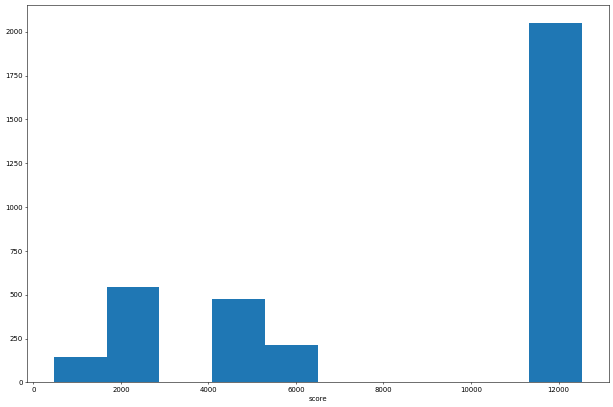

In [13]:

plt.figure(figsize=(15,10),dpi=50)
plt.hist(df_scores_mtx.sum(axis=1).sort_values(ascending=False).values)
plt.xlabel('score')
plt.show()

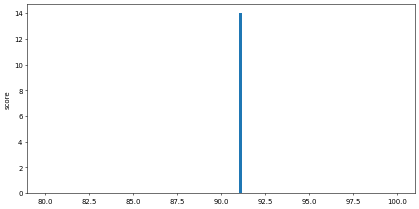

In [14]:
plt.figure(figsize=(10,5),dpi=50)
plt.hist(df_scores_mtx.count(axis=0).sort_values(ascending=False).values,bins=100,range=(80,100))
plt.ylabel('score')
plt.show()

### 3.2.6. Create Y and R matrics

In [14]:
df_scores_r=df_scores_mtx.copy()
df_scores_r[df_scores_r.notna()]=1
df_scores_r.fillna(0,inplace=True)
df_scores_r.head()

,32,33,37,56,59,61,135,140,144,209,...,580275015,580677105,585725013,585818227,587939460,1357960095,1357964016,1358164521,1358200299,1358569300
3fd66200f964a52004e61ee3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3fd66200f964a52005e81ee3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3fd66200f964a52006ea1ee3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3fd66200f964a52008e71ee3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3fd66200f964a5200eea1ee3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
Y=df_scores_mtx.values
Y.shape

(3428, 7779)

In [16]:
R=df_scores_r.values
R.shape

(3428, 7779)

### 3.2.7 Set parameter

In [17]:
Ynorm, Ymean = normalizeRatings(Y, R)

In [18]:
num_users = Y.shape[1]
num_venues = Y.shape[0]
num_features = 20
X = np.random.rand(num_venues, num_features)
Theta = np.random.rand(num_users, num_features)
initial_parameters = np.hstack((X.flatten(),Theta.flatten()))
print(X.shape,Theta.shape,Ynorm.shape,R.shape,initial_parameters)

(3428, 20) (7779, 20) (3428, 7779) (3428, 7779) [0.5497481  0.30493948 0.90632723 ... 0.94173674 0.06790213 0.72406927]


### 3.2.8. Training

In [76]:
lamda = 0
res = spo.minimize(fun=cofiCostFunc, x0=initial_parameters,
                      args=(Ynorm, R, num_users, num_venues, num_features, lamda),
                      method='L-BFGS-B',jac=True, options={'maxiter': 100})
X = res.x[0:num_venues*num_features].reshape(num_venues, num_features)
Theta = res.x[num_venues*num_features:].reshape(num_users, num_features)
res

198668821.4611661
194845693.46312618
180099722.69334078
129299972.32883376
27507140.918106288
7229234.574354617
2124817.6766641904
1247694.6980264345
877492.3588169599
678012.4145431644
581771.1516751642
399765.9328824308
364665.8761711901
313989.4581566013
296677.25675956684
262545.53636203357
256389.29860382227
254043.53515526387
251652.22523954744
245994.96050508632
240627.95753526807
234979.8014340569
222616.56931056472
212886.46935505111
194259.81385964534
177240.49476111017
169781.00952539907
164728.28573891148
164067.21611894836
160818.0636963818
154871.35528719897
146331.0667103684
144416.45209268865
141746.85946915718
135983.54315187654
132564.266573328
123849.89404807583
116598.02499876189
113897.23557954532
110861.88265392894
108332.80212848043
105147.88651336462
102015.22162063415
98180.79910350185
95041.95761479787
91934.72197791864
90882.87077878765
89459.56034085198
88511.41098379833
86671.98329908132
84581.52176031403
82772.16099034727
81356.13835420806
79815.7922605503

      fun: 49883.38991221637
 hess_inv: <224140x224140 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.17590346, -0.69088434, -0.77141259, ..., -1.32746167,
       -1.50464096, -1.62798696])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 104
      nit: 100
   status: 1
  success: False
        x: array([-0.09141954, -0.32857923, -0.01094323, ...,  0.09701348,
        0.2596123 ,  0.05640992])

Text(0.5, 0, 'Num of features')

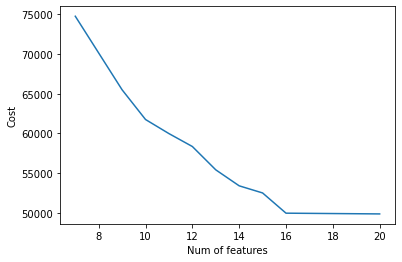

In [19]:

ar=np.array([[7,74735],[9,65484],[10,61751],[11,59981],[12,58357],[13,55425],[14,53415],[15,52518],[16,49976],[20,49883]])
df_trains=pd.DataFrame(ar[:,1],index=ar[:,0],columns=['num of features'])
plt.figure()
plt.plot(df_trains)
plt.ylabel('Cost')
plt.xlabel('Num of features')
#plt.show()

In [77]:
np.savetxt('./Theta.txt',Theta)
np.savetxt('./X.txt',X)
for filename in ['./Theta.txt','./X.txt']:
    cos.upload_file(Filename=filename, Bucket=credentials['BUCKET'], Key=filename )

In [20]:
for filename in ['./Theta.txt','./X.txt']:
    cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)
Theta=np.loadtxt('./Theta.txt')
X=np.loadtxt('./X.txt')

### 3.2.9. Predict

In [21]:
p = X @ Theta.T
train_pred = p + Ymean

### 3.2.10. Predicted Restaurant and users data frame

In [22]:
df_pred_scores=pd.DataFrame(train_pred,index=df_scores_r.index[0:Y.shape[0]].values,columns=df_scores_mtx.columns)
df_pred_scores['mean']=df_pred_scores.mean(axis=1)
df_pred_scores.sort_values('mean',ascending=False)

,32,33,37,56,59,61,135,140,144,209,...,580677105,585725013,585818227,587939460,1357960095,1357964016,1358164521,1358200299,1358569300,mean
5ba682d616ef670039f6d605,2.014082,1.987447,2.024548,2.009573,1.999409,1.989089,2.010838,2.034907,2.026080,1.990084,...,2.033855,1.999624,2.024415,1.984714,2.021710,2.000230,2.005405,2.003788,2.058474,2.011990
5c13bf838afbe0002de55061,1.999777,2.009438,2.003895,2.006324,1.996612,2.007620,2.010113,2.024210,2.015391,2.005031,...,2.008623,2.018575,2.020279,2.028533,2.009758,1.997292,2.000425,2.011011,2.025610,2.010381
4cb218c7ef1b37041ca24800,2.005399,1.997427,2.002186,2.008171,2.001285,1.998127,2.001735,2.011519,2.026425,2.008373,...,2.023548,2.004637,2.030535,2.008385,2.036986,1.998659,2.006321,2.005037,2.017751,2.008940
57fa6c67498e23e3cf1861f4,1.991532,1.997121,1.999090,2.003478,1.999316,1.997626,2.005188,2.018935,2.029585,2.011068,...,2.017037,2.005195,2.019939,2.026729,2.025415,2.004183,2.000474,2.000769,2.038632,2.008862
5615a472498ed90cc0623b3c,2.002414,2.006484,2.006006,2.005894,2.005643,2.005005,2.002959,2.022838,2.021965,2.003634,...,2.018915,2.005916,2.014568,2.020220,2.019994,2.003436,2.006043,2.003432,2.034187,2.007986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5adcbd038173cb433ff5350d,1.380004,0.906656,1.163593,1.013677,1.153813,1.260904,0.658151,0.948888,0.349389,1.262704,...,1.294729,0.889481,1.391693,1.115655,1.340609,1.206501,1.009791,0.998708,1.162758,1.004781
52f66aa6498e08f2b069ab80,1.010813,1.001961,0.999621,1.014716,1.026965,1.003386,0.999194,1.000771,0.972044,1.015611,...,1.005195,1.014636,1.002966,1.012147,1.003027,1.019795,1.018378,0.993541,1.029758,1.003949
596fb23c31ac6c49a7f6b6c4,1.001377,0.998714,1.005378,1.002443,1.010739,1.001027,1.003945,1.005788,1.000046,1.001039,...,1.012676,1.003797,1.008281,0.996997,1.011945,1.004546,1.006479,0.999801,1.009250,1.003059
4cddd9dadb125481c4f22cce,1.115300,0.622533,1.091012,0.939870,1.112741,1.031712,0.704897,0.963842,0.837573,1.217481,...,1.323762,0.856007,1.312008,1.331637,1.243226,1.091280,0.961142,0.952853,1.218237,1.002371


# 4. Result

## 4.1. Look up sample user's score

### 4.1.1. Sample user's top n predicted food venues.

In [24]:
df_venues_cat[df_venues['venue_id'].isin(df_pred_scores.loc[:,1265687].sort_values(ascending=False).index[0:20])][['venue_name','category1_name','category2_name','category3_name']]

,venue_name,category1_name,category2_name,category3_name
276,Light Horse Tavern,American Restaurant,New American Restaurant,0
608,Crown Shy,Restaurant,NaN,0
612,Pera Soho,Restaurant,NaN,0
616,Andy's Teriyaki & Taco,Restaurant,NaN,0
1796,yakitori tatsu,Food Stand,NaN,0
1883,Simit Sarayı,Turkish Restaurant,Borek Place,0
2045,Aleppo Restaurant,Kebab Restaurant,NaN,0
2058,Doner Kebab NYC,Kebab Restaurant,NaN,0
2069,Sarita's Mac and Cheese Murray Hill,Mac & Cheese Joint,NaN,0
2777,Pig and Khao,Asian Restaurant,Filipino Restaurant,NaN


### 4.1.2. Sample user's top n already scored food venues.

 <pre> Make sure if already high scored food venues are predicted high as well </pre>

In [25]:
df_tmp=pd.merge(df_scores[df_scores['user_id']==1265687].sort_values('score',ascending=False),df_venues,on=['venue_id']).head()
df_tmp

,user_id,venue_id,score,venue_name,category_id,category_name
0,1265687,582a1b095f78034bcfb69186,5,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant
1,1265687,56e064dc498e1ba17ec18b6f,5,Fu Yuan,56aa371be4b08b9a8d57350b,Food Stand
2,1265687,5d7d2f62774999000703bdcb,3,Yin Ji Chang Fen 銀記腸粉店,52af3a7c3cf9994f4e043bed,Cantonese Restaurant
3,1265687,5a13402d286fda3f038703e0,3,Le Privé,4bf58dd8d48988d10c941735,French Restaurant
4,1265687,58225a8f001d8755c9c4bcd1,3,Sweetcatch Poke Bar,5bae9231bedf3950379f89d4,Poke Place


In [26]:
df_tmp2=df_venues[df_venues['venue_id'].isin(df_pred_scores.loc[:,1265687].sort_values(ascending=False).index)]
df_tmp2[df_tmp2['venue_name'].isin(df_tmp['venue_name'])]


,venue_id,venue_name,category_id,category_name
2,582a1b095f78034bcfb69186,Sami's Kebab House,503288ae91d4c4b30a586d67,Afghan Restaurant
218,5a13402d286fda3f038703e0,Le Privé,4bf58dd8d48988d10c941735,French Restaurant
904,56e064dc498e1ba17ec18b6f,Fu Yuan,56aa371be4b08b9a8d57350b,Food Stand
2993,58225a8f001d8755c9c4bcd1,Sweetcatch Poke Bar,5bae9231bedf3950379f89d4,Poke Place
3558,5d7d2f62774999000703bdcb,Yin Ji Chang Fen 銀記腸粉店,52af3a7c3cf9994f4e043bed,Cantonese Restaurant


### <pre><span style="color:#2980B9">5 scored  food venues were highly ranked on prediction as well, so seems to be predicted enough good  over all.</pre>

___

<a id='item5'></a>

# 5. Discussion

## 5.1. Sampling user and recommended restaurant
<pre> Users will be randamly sampled.</pre>

### 5.1.1. Pick up 10 users randamly 

In [76]:
import random

df_scores_rank=pd.DataFrame(index=[],columns=['user_id','venue_name','score'])
for col in df_pred_scores.columns[random.sample(range(df_pred_scores.shape[1]),k=10)]:
    for idx in df_pred_scores.loc[:,col].sort_values(ascending=False)[0:10].index:
        r=pd.Series([col,df_venues[df_venues['venue_id']==idx]['venue_name'].values[0],df_pred_scores.loc[idx,col]],index=df_scores_rank.columns)
        df_scores_rank=df_scores_rank.append(r,ignore_index=True)
df_scores_rank=pd.merge(df_scores_rank,df_venues,on='venue_name')[['user_id','category_name','venue_name']].sort_values('user_id')
df_scores_rank.head(20)

,user_id,category_name,venue_name
37,8155,Dessert Shop,The Sweet Shop NYC
36,8155,Dessert Shop,Tea Magic
38,8155,Dessert Shop,Made By Pauline
39,8155,Dessert Shop,HARBS
40,8155,Dessert Shop,Beard Papa’s
41,8155,Dessert Shop,Marc's CheeseCake
43,8155,Dessert Shop,Harbs
44,8155,Dessert Shop,Alfonso's Pastry Shoppe
45,8155,Dessert Shop,Ray's Candy Store
42,8155,Dessert Shop,Antepli Baklava


### 5.1.2. Look up how category of their recommended restaulants are varied.

<Figure size 432x288 with 0 Axes>

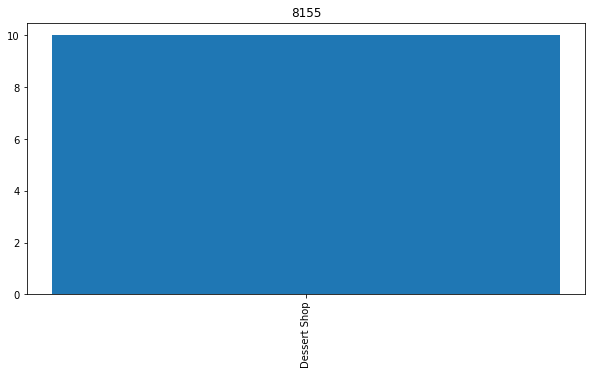

<Figure size 432x288 with 0 Axes>

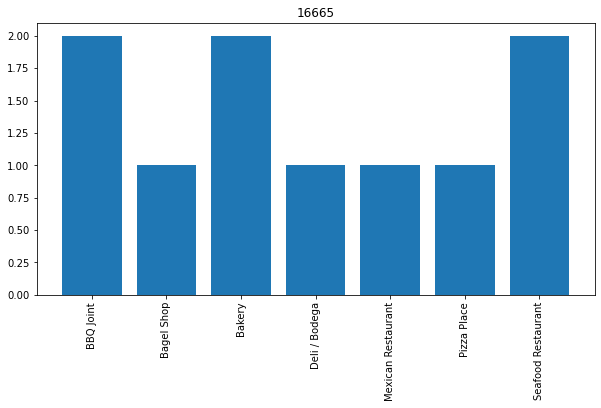

<Figure size 432x288 with 0 Axes>

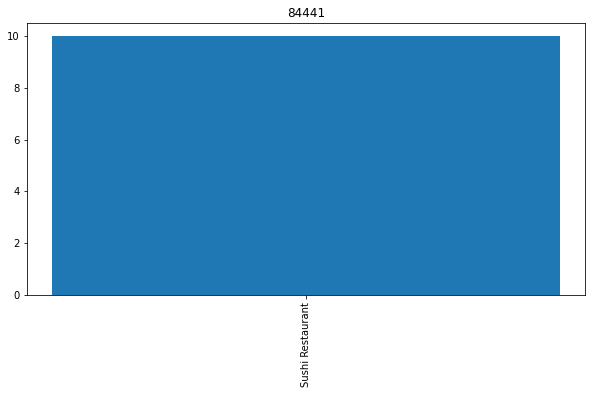

<Figure size 432x288 with 0 Axes>

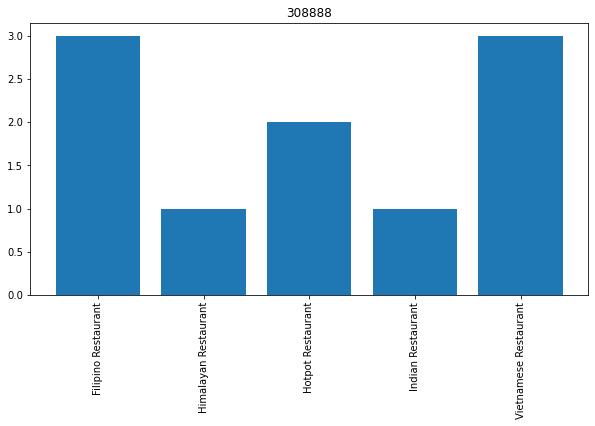

<Figure size 432x288 with 0 Axes>

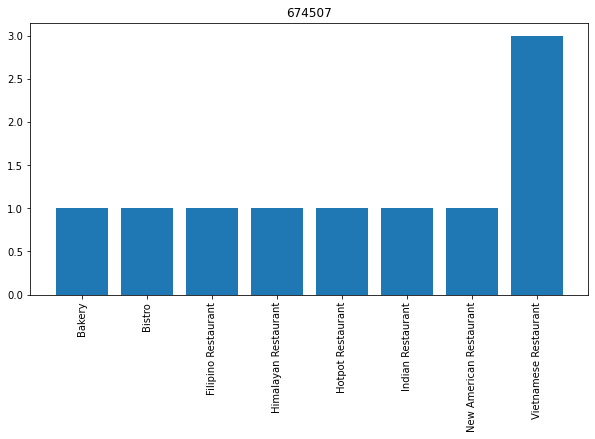

<Figure size 432x288 with 0 Axes>

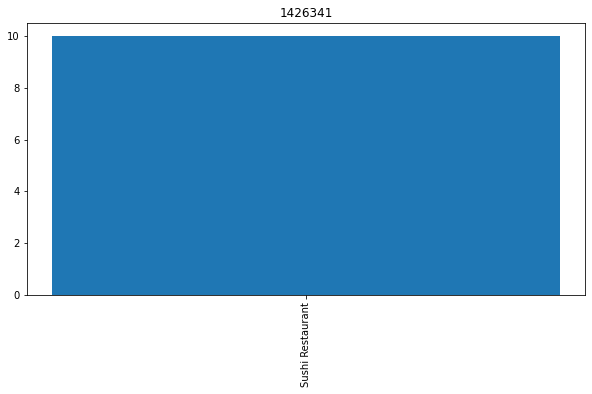

<Figure size 432x288 with 0 Axes>

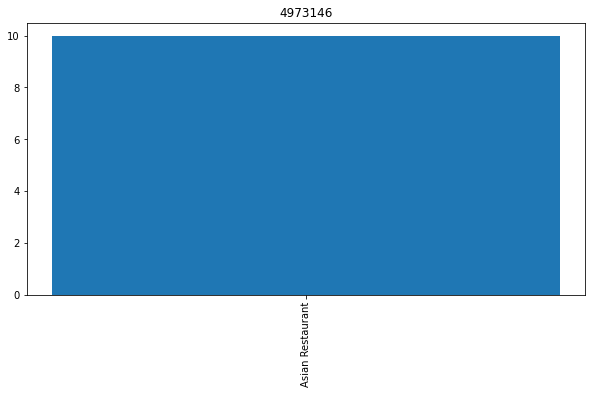

<Figure size 432x288 with 0 Axes>

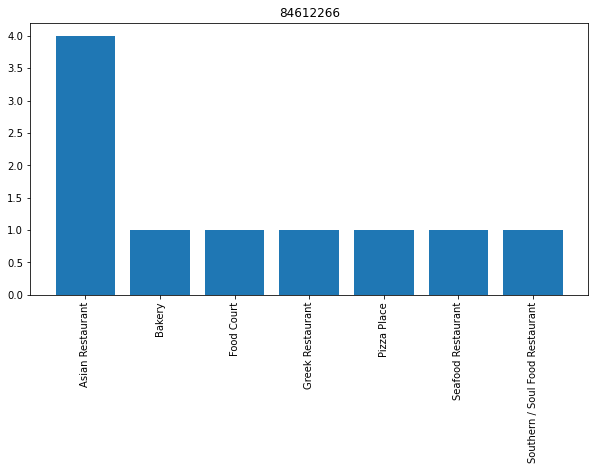

<Figure size 432x288 with 0 Axes>

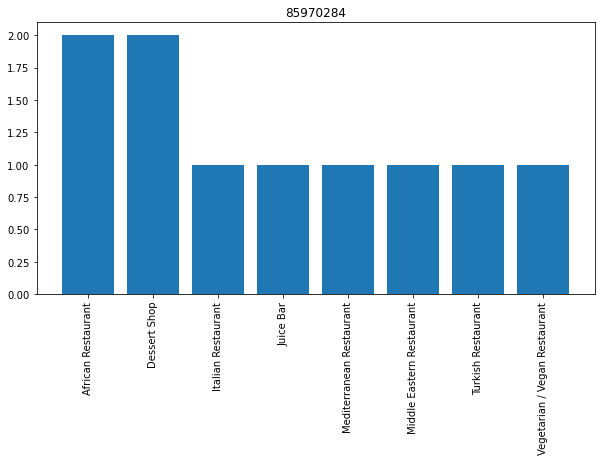

<Figure size 432x288 with 0 Axes>

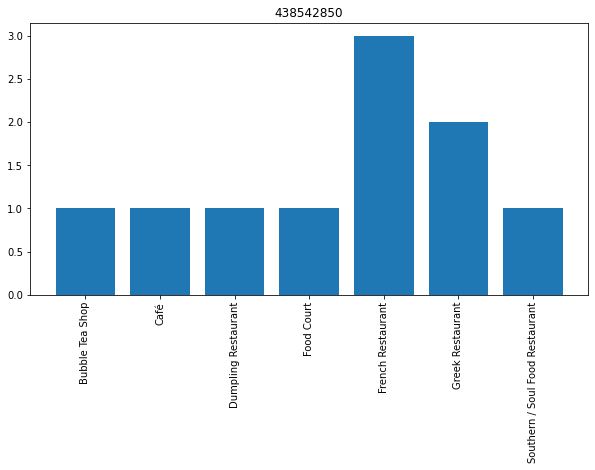

In [77]:
for key,grp in df_scores_rank.groupby('user_id'):
    fig = plt.figure()
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    plt.title(key)
#    plt.yticks(np.arange(0, 5, 0.5))
    plt.bar(grp.groupby('category_name').count().index,grp.groupby('category_name').count().venue_name,)

### <pre><span style="color:#2980B9">It is apparent that their recommended food venuesbelong to same category, but in some cases they cover a variety of categories.</pre>

___

## 5.2. Identify location on map 

 <pre> Here, we focus on user <font color="#c71585">53052590</font>, whoes cover a variety of categories recommended, and identify them on map</pre>

### 5.2.1. Import modules

In [23]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a_1



openssl-1.1.1g       | 2.1 MB    | #####

In [24]:
!conda install folium -c conda-forge --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.0           |   py36h45558ae_0         640 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py_0
  br

### 5.2.2. Get latitudes and longitudes

In [25]:
import folium
address = 'New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [26]:
liked5=df_scores_mtx.loc[:,53052590].sort_values(ascending=False).index.values[0:5]
pred5=df_pred_scores.loc[:,53052590].sort_values(ascending=False).index.values[0:5]
print('liked5:{}'.format(liked5))
print('pred5:{}'.format(pred5))

liked5:['5d181bac17d3b9002329f126' '58cf24d36ad5a131a79f0501'
 '5c8bc9ba625a66002c543e3d' '4e3eb2d2a809ba757c1a5b57'
 '4e3d9c702271d21e86f8ca4e']
pred5:['4b85de98f964a5201f7731e3' '548884d0498e1e200b4b2ee5'
 '59f6759d9e3b655d339b3405' '56465934498eb7f010d1ad98'
 '4d9788afa2c654817bf3db53']


In [27]:
df_5liked=pd.DataFrame(index=[],columns=['venue_id','venue_name','lat','lng'])
for vid in liked5:
    url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(vid,CLIENT_ID, CLIENT_SECRET, VERSION)
    ret=requests.get(url).json()['response']['venue']
    record=pd.Series([ret['id'],ret['name'],ret['location']['lat'],ret['location']['lng']],index=df_5liked.columns)
    df_5liked=df_5liked.append(record,ignore_index=True)


In [28]:
df_5pred=pd.DataFrame(index=[],columns=['venue_id','venue_name','lat','lng'])
for vid in pred5:
    url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(vid,CLIENT_ID, CLIENT_SECRET, VERSION)
    ret=requests.get(url).json()['response']['venue']
    record=pd.Series([ret['id'],ret['name'],ret['location']['lat'],ret['location']['lng']],index=df_5pred.columns)
    df_5pred=df_5pred.append(record,ignore_index=True)


In [29]:
pd.merge(df_5liked,df_venues,on='venue_id')

,venue_id,venue_name_x,lat,lng,venue_name_y,category_id,category_name
0,5d181bac17d3b9002329f126,L’Accolade,40.732486,-74.003810,L’Accolade,52e81612bcbc57f1066b79f1,Bistro
1,58cf24d36ad5a131a79f0501,Together,40.612122,-73.978533,Together,56aa371be4b08b9a8d573568,Burmese Restaurant
2,5c8bc9ba625a66002c543e3d,North Miznon,40.778329,-73.980973,North Miznon,56aa371be4b08b9a8d573529,Israeli Restaurant
3,4e3eb2d2a809ba757c1a5b57,Grant Café,40.672791,-73.870721,Grant Café,4bf58dd8d48988d143941735,Breakfast Spot
4,4e3d9c702271d21e86f8ca4e,Joloff Restaurant 2,40.684147,-73.954116,Joloff Restaurant 2,4bf58dd8d48988d1c8941735,African Restaurant


In [30]:
df_5liked2=pd.merge(df_5liked,df_venues,on='venue_id').rename(columns={'category':'cat'})
df_5pred2=pd.merge(df_5pred,df_venues,on='venue_id').rename(columns={'category':'cat'})

### 5.2.3 Create a map of New York with his liked and predicted top5 for each

 <pre>  <font color="#3186cc">Blue popups</font> are venues already scored by him, and <font color='#ff0080'>Red popups</font> are ones predicted</pre>

In [36]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(width=1000,height=1000,location=[latitude, longitude], zoom_start=10)

# add markers to map
for name,lat, lng in zip(df_5liked['venue_name'],df_5liked['lat'], df_5liked['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
for name,lat, lng in zip(df_5pred['venue_name'],df_5pred['lat'], df_5pred['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#ff0080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

# 6. Conclusion

#### <pre> We could get recommendation somehow.  We hope we could propose users to visit their recommendation and they got back to us! </pre>
#### <pre>For more precise prediction, we need more data as followings</pre>
1. Much more cross evalutions. (Scoring was done base on "tips", "listed", 'liked' flag and category, however, there were not enough cross evalutions for collaborative filtering to reach success.) 
2. Venues they visited.    (As for now, API does not suppot it)
</pre>